# **Trade-Offs in Missing Data Conventions**

# **Missing Data in Pandas**

* **None:Pythonic missing data**

In [2]:
import numpy as np
import pandas as pd

In [3]:
vals1 = np.array([1, None, 3, 4])
print(vals1)

[1 None 3 4]


In [4]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
113 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
3.63 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



* **Nan: Missing numerical data**

In [5]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [6]:
1 + np.nan

nan

In [7]:
0 + np.nan

nan

In [8]:
vals2.sum(), vals2.min(), vals2.max()


(nan, nan, nan)

In [9]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

* **NaN and None in pandas**

In [10]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [12]:
x = pd.Series(range(2), dtype=int)
print(x)

0    0
1    1
dtype: int32


In [17]:
x[0] = None
print(x)

0    NaN
1    1.0
dtype: float64


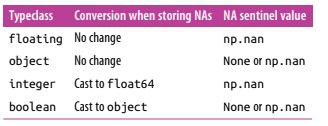

# **Operating on Null Values**

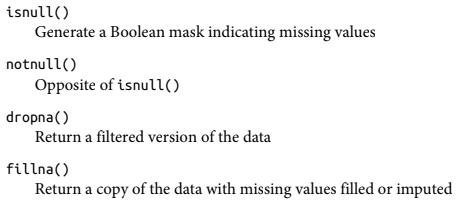

* **Detecting null values**

In [18]:
data = pd.Series([1, np.nan, 'hello', None])

In [19]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [20]:
data[data.notnull()]

0        1
2    hello
dtype: object

* **Dropping null values**

In [21]:
data.dropna()

0        1
2    hello
dtype: object

In [23]:
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
print(df)

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6


In [24]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [25]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [26]:
df[3] = np.nan
print(df)

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


In [27]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


* **filling null values**